In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.getcwd()))

In [2]:
import bartz
from stochtree import BARTModel
from bart_playground import *

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
import arviz as az
import time

INFO:arviz.preview:arviz_base not installed
INFO:arviz.preview:arviz_stats not installed
INFO:arviz.preview:arviz_plots not installed


In [4]:
import numpy as np

from ucimlrepo import fetch_ucirepo 
  
winequality = fetch_ucirepo(id=186) 
  
# data (as pandas dataframes) 
X = winequality.data.features
y = winequality.data.targets

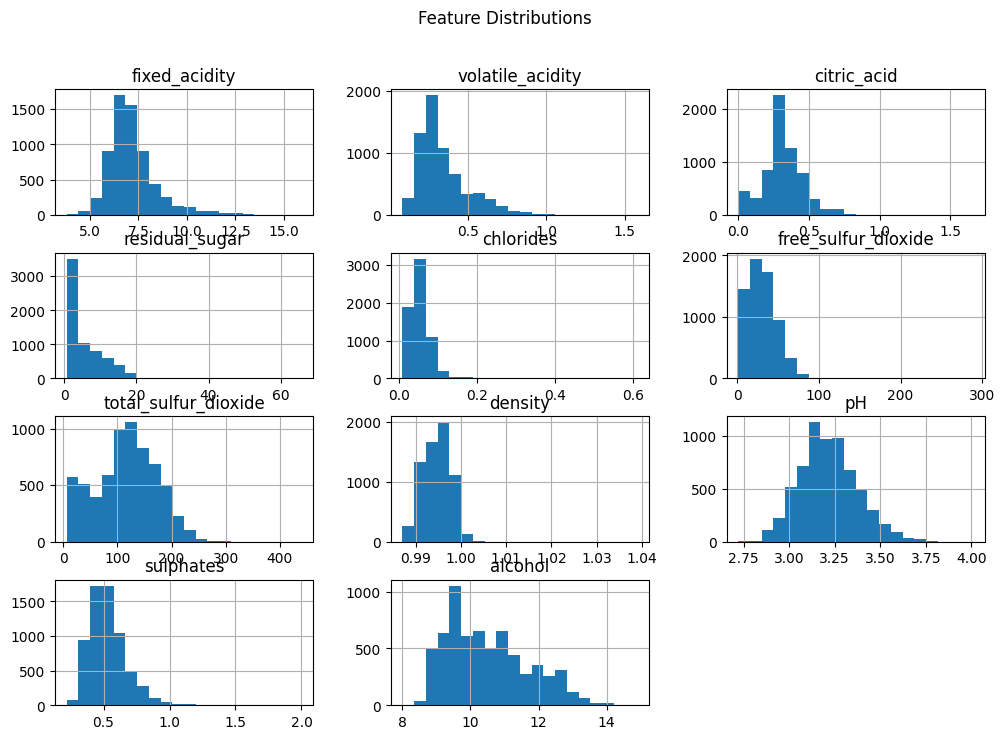

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

X.hist(figsize=(12, 8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

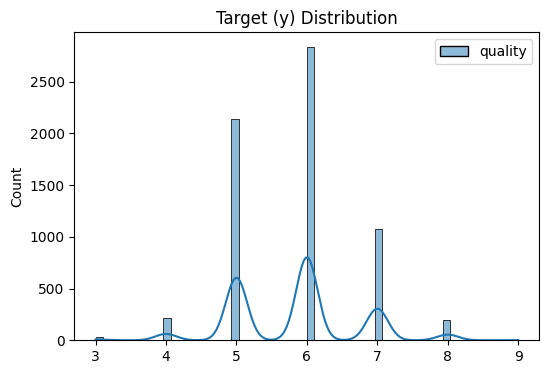

In [6]:
plt.figure(figsize=(6, 4))
sns.histplot(y, kde=True)
plt.title("Target (y) Distribution")
plt.show()

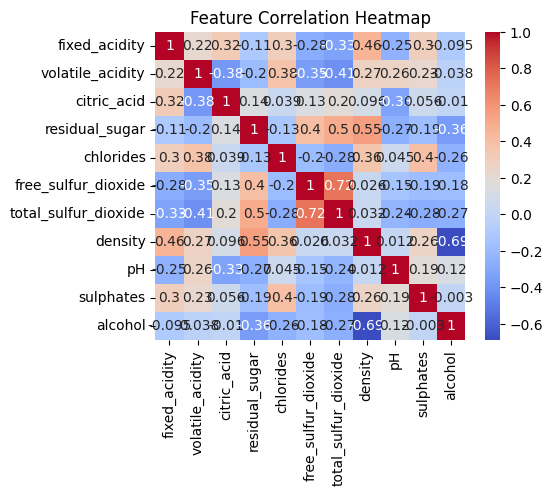

In [7]:
plt.figure(figsize=(5, 4))
corr = X.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
X = X.values.astype(float)
y = np.array(y).astype(np.float32).reshape(-1)

In [9]:
import comparison
import pandas as pd

rhat_df = comparison.gelman_rubin_r_compare(X, y, n_runs=5, n_chains=4, ndpost=500, nskip=200, n_trees=100, n_jobs=5)
mean_row = pd.DataFrame([rhat_df.mean()], index=["mean"])
std_row = pd.DataFrame([rhat_df.std()], index=["std"])
rhat_df_with_stats = pd.concat([rhat_df, mean_row, std_row])
print("Gelman-Rubin R̂ comparison matrix:")
print(rhat_df_with_stats)

Gelman-Rubin R̂ comparison matrix:
      MultiBART_Rhat_Sigma2  DefaultBART_Rhat_Sigma2  MultiBART_Rhat_RMSE  \
0                  1.140023                 1.160568             1.194168   
1                  1.311697                 1.169839             1.261699   
2                  1.306318                 1.122423             1.104924   
3                  1.212179                 1.159943             1.208274   
4                  1.082005                 1.112590             1.128037   
mean               1.210445                 1.145073             1.179420   
std                0.101122                 0.025704             0.063265   

      DefaultBART_Rhat_RMSE  
0                  1.433855  
1                  1.519990  
2                  1.303316  
3                  1.385961  
4                  1.330947  
mean               1.394814  
std                0.086201  


In [10]:
rhat_df.to_csv("results/real2_WineQuality_rhat.csv", index=False)

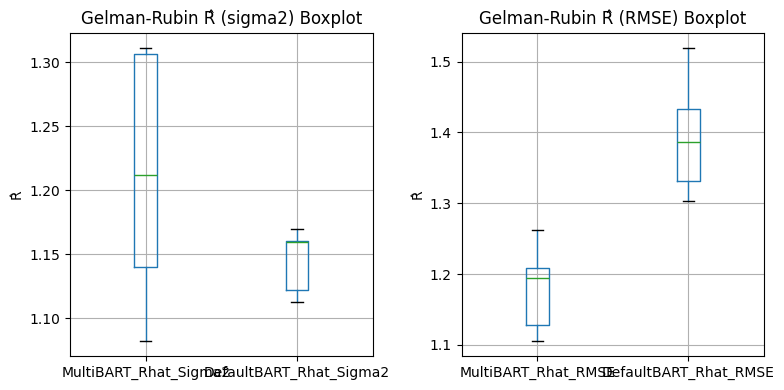

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4))

# sigma2 boxplot
rhat_df[["MultiBART_Rhat_Sigma2", "DefaultBART_Rhat_Sigma2"]].boxplot(ax=axes[0])
axes[0].set_title("Gelman-Rubin R̂ (sigma2) Boxplot")
axes[0].set_ylabel("R̂")

# rmse boxplot
rhat_df[["MultiBART_Rhat_RMSE", "DefaultBART_Rhat_RMSE"]].boxplot(ax=axes[1])
axes[1].set_title("Gelman-Rubin R̂ (RMSE) Boxplot")
axes[1].set_ylabel("R̂")

plt.tight_layout()
plt.show()

c:\Learning\Phd\BART\bartpy\bart_env\Lib\site-packages\joblib\externals\loky\process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


test_mse:
      bart_mtmh      bart       btz       sto        rf       xgb
0      0.482989  0.491901  0.493147  0.491956  0.389235  0.423869
1      0.459687  0.459051  0.476206  0.476029  0.359287  0.416377
2      0.490422  0.508893  0.506553  0.505212  0.384622  0.407832
3      0.462518  0.470832  0.465667  0.469902  0.346424  0.386311
4      0.449985  0.460761  0.463916  0.470552  0.363344  0.391157
5      0.466344  0.485216  0.472765  0.490128  0.369662  0.415728
6      0.474084  0.496156  0.505021  0.496460  0.377460  0.403745
7      0.499155  0.485649  0.486098  0.486358  0.379783  0.425224
8      0.433695  0.434129  0.445438  0.448221  0.332221  0.366885
9      0.500357  0.514224  0.522249  0.540108  0.427461  0.448023
mean   0.471924  0.480681  0.483706  0.487493  0.372950  0.408515
std    0.021683  0.024631  0.023367  0.024633  0.026017  0.022950



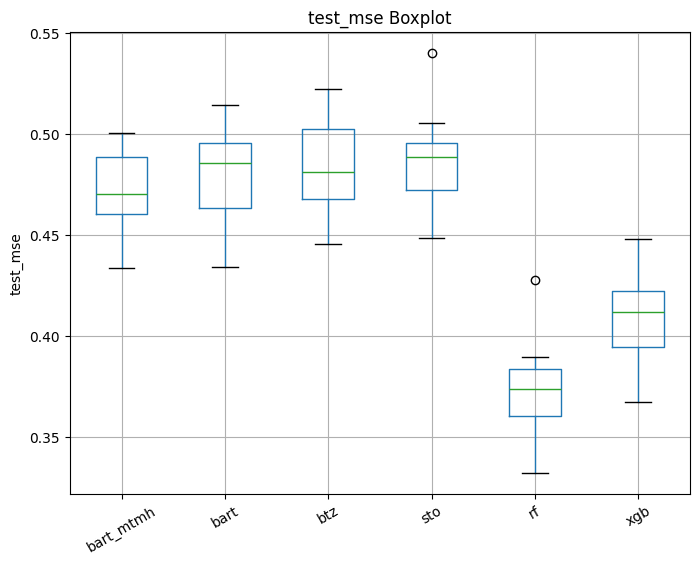

train_mse:
      bart_mtmh      bart       btz       sto        rf       xgb
0      0.355911  0.418978  0.428884  0.444306  0.051776  0.063149
1      0.352759  0.424281  0.439490  0.452135  0.053084  0.067435
2      0.341595  0.420902  0.431703  0.447085  0.051887  0.057334
3      0.365028  0.422967  0.444724  0.457556  0.054751  0.057431
4      0.355502  0.425241  0.427983  0.448362  0.051670  0.068970
5      0.360911  0.431054  0.431996  0.457773  0.051974  0.068156
6      0.358132  0.421560  0.435257  0.451109  0.051510  0.060060
7      0.355642  0.409875  0.436144  0.443668  0.051897  0.070524
8      0.369615  0.425746  0.443381  0.461997  0.053018  0.065569
9      0.341666  0.413458  0.420091  0.442201  0.049368  0.059666
mean   0.355676  0.421406  0.433965  0.450619  0.052093  0.063829
std    0.008934  0.006143  0.007487  0.006732  0.001376  0.004957



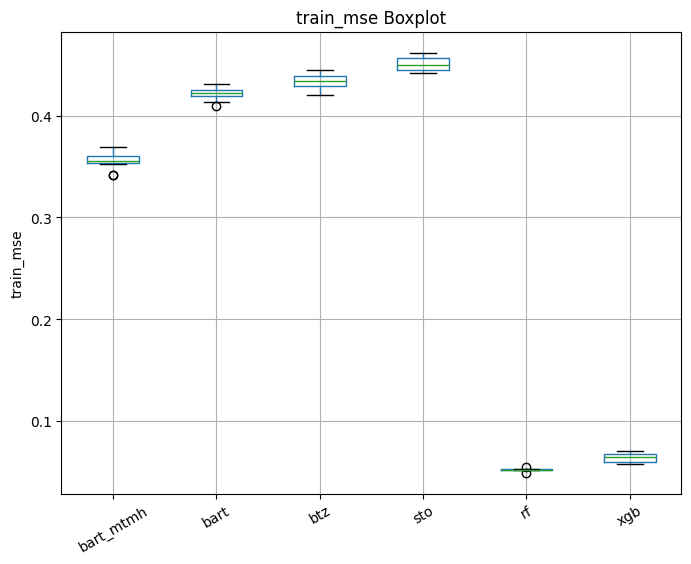

pi_length:
      bart_mtmh      bart       btz       sto
0      2.419057  2.511306  2.628959  1.819718
1      2.394811  2.544966  2.635041  1.846188
2      2.368600  2.507860  2.598535  1.838215
3      2.443858  2.532842  2.667699  1.889222
4      2.418981  2.526152  2.605682  1.816130
5      2.442628  2.553595  2.616238  1.868205
6      2.430257  2.525301  2.642607  1.827854
7      2.429998  2.511453  2.630266  1.797583
8      2.469651  2.552524  2.677861  1.894200
9      2.385152  2.500070  2.602539  1.819996
mean   2.420299  2.526607  2.630543  1.841731
std    0.030264  0.019141  0.026707  0.032482



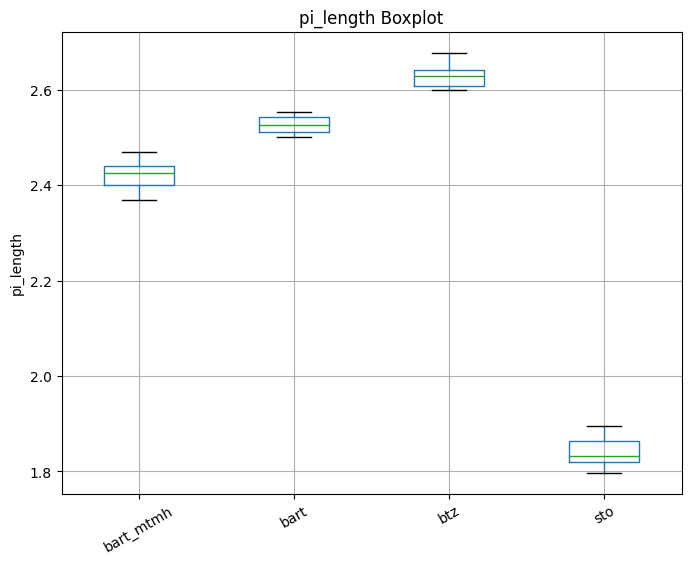

coverage:
      bart_mtmh      bart       btz       sto
0      0.916923  0.920000  0.932308  0.790154
1      0.916308  0.939692  0.936615  0.813538
2      0.907692  0.916308  0.926769  0.769231
3      0.916308  0.922462  0.940923  0.799385
4      0.927385  0.926769  0.931077  0.780308
5      0.920000  0.925538  0.931077  0.799385
6      0.913846  0.921846  0.927385  0.795077
7      0.908923  0.926769  0.935385  0.793231
8      0.939077  0.932923  0.944000  0.823385
9      0.902154  0.910769  0.920615  0.785846
mean   0.916862  0.924308  0.932615  0.794954
std    0.010473  0.008164  0.006934  0.015557



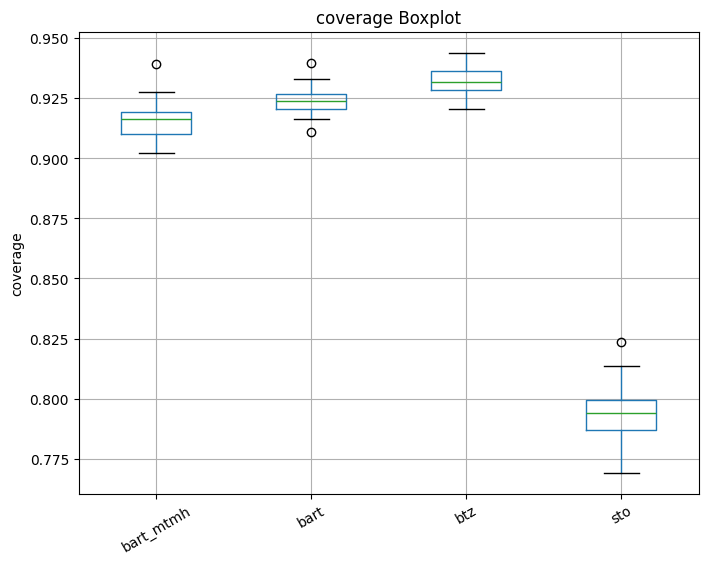

train_time:
      bart_mtmh      bart       btz       sto        rf       xgb
0     22.326765  2.953018  7.197298  6.893982  3.237690  0.244438
1     22.485494  2.960817  7.317612  6.824210  3.312979  0.299103
2     22.594894  2.939891  7.460306  6.589527  3.310086  0.266358
3     22.646096  2.928976  7.380421  6.889600  3.552125  0.291803
4     23.241131  3.319190  7.576218  6.839426  3.133737  0.253544
5     22.723025  3.055717  6.809504  7.144670  3.440939  0.202023
6     22.736283  3.013944  7.172156  7.236950  3.268639  0.174518
7     22.375670  3.195169  7.245528  7.022118  3.188895  0.175055
8     22.421428  3.211362  7.247298  7.310195  3.270556  0.194403
9     22.320984  3.373664  7.453132  7.010763  3.356179  0.173256
mean  22.587177  3.095175  7.285947  6.976144  3.307183  0.227450
std    0.277507  0.166463  0.211731  0.215203  0.121134  0.049421



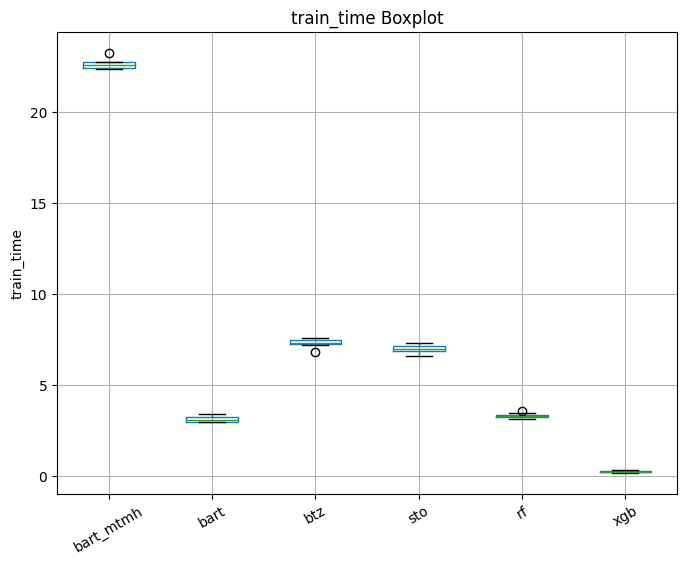

In [12]:
import matplotlib.pyplot as plt

mse_results = comparison.bart_mse_comparison(X, y, n_runs=10, n_skip=100, n_post=100, n_trees=100, n_jobs=5)
for k, v in mse_results.items():
    mean_row = pd.DataFrame([v.mean()], index=["mean"])
    std_row = pd.DataFrame([v.std()], index=["std"])
    v_with_stats = pd.concat([v, mean_row, std_row])
    print(f"{k}:\n{v_with_stats}\n")
    
    plt.figure(figsize=(8, 6))
    v.boxplot()
    plt.title(f"{k} Boxplot")
    plt.ylabel(k)
    plt.xticks(rotation=30)
    plt.show()

In [13]:
for k, v in mse_results.items():
    csv_name = f"results/real2_WineQuality_{k}.csv"
    v.to_csv(csv_name, index=False)